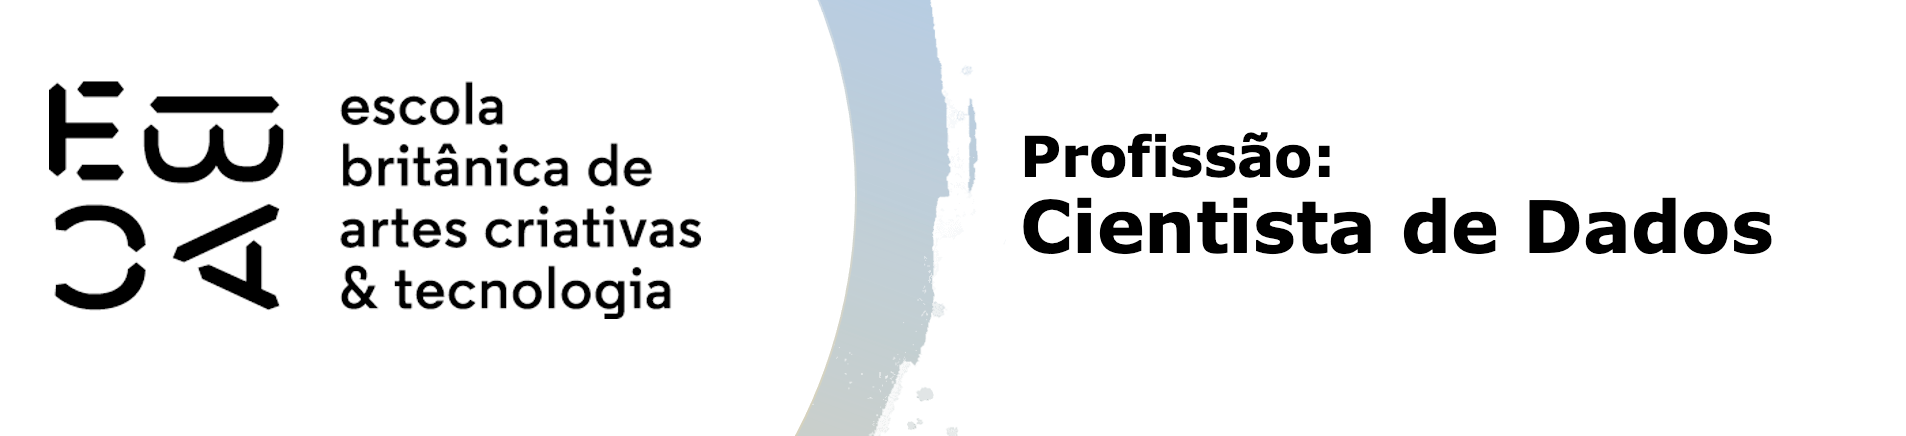

# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from tqdm.notebook import tqdm

import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.Revenue.value_counts(dropna=False)

Revenue
False    10422
True      1908
Name: count, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [5]:
# Variáveis do escopo
scope_vars = [
    'Administrative', 
    'Administrative_Duration', 
    'Informational', 
    'Informational_Duration', 
    'ProductRelated', 
    'ProductRelated_Duration'
]

stats = df[scope_vars].info()
print(stats)
print("Contagem de Missing Values:")
print(df[scope_vars].isnull().sum())

df_escopo = df[scope_vars]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 578.1 KB
None
Contagem de Missing Values:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
dtype: int64


Temos todos os dados para as colunas definidas, então vamos prosseguir com as análises

## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

### Cotovelo

  0%|          | 0/14 [00:00<?, ?it/s]

Valores de SQD por número de clusters:
    num_clusters           SQD
0              1  73980.000000
1              2  51210.558199
2              3  43203.306554
3              4  37339.843162
4              5  33467.737714
5              6  29690.716738
6              7  26905.494309
7              8  24620.975888
8              9  22511.583065
9             10  21393.627155
10            11  19997.743335
11            12  19126.801304
12            13  18287.108909
13            14  17575.468822


<Figure size 1000x600 with 0 Axes>

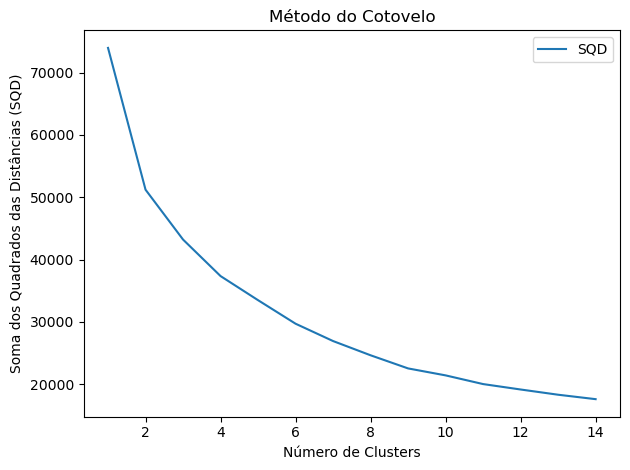

In [6]:
# Padronização dos dados
scaler = StandardScaler()
X_pad = scaler.fit_transform(df_escopo)

# Método do Cotovelo
SQD = []
K = range(1, 15)

for k in tqdm(K):
    km = KMeans(n_clusters=k, random_state=42)
    km = km.fit(X_pad)
    SQD.append(km.inertia_)

# Criando DataFrame com resultados
df_cotovelo = pd.DataFrame({'num_clusters': list(range(1, len(SQD)+1)), 'SQD': SQD})

# Plotando o método do Cotovelo
plt.figure(figsize=(10, 6))
df_cotovelo.plot(x='num_clusters', y='SQD')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma dos Quadrados das Distâncias (SQD)')
plt.tight_layout()

# Imprimindo os valores de SQD
print("Valores de SQD por número de clusters:")
print(df_cotovelo)

### Silhueta

  0%|          | 0/9 [00:00<?, ?it/s]

Resultados da Análise de Silhueta:
   n_clusters  silhueta_média
0           2        0.622424
1           3        0.504676
2           4        0.506856
3           5        0.469483
4           6        0.460555
5           7        0.471480
6           8        0.441320
7           9        0.412168
8          10        0.397579


<Figure size 1000x600 with 0 Axes>

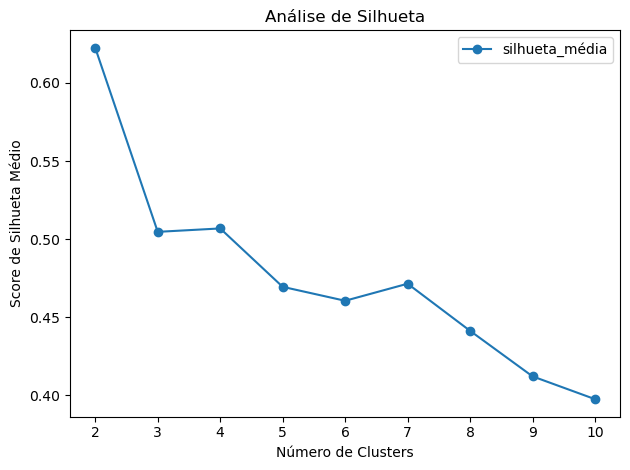

In [7]:
# Padronização dos dados
scaler = StandardScaler()
X_pad = scaler.fit_transform(df_escopo)

# Inicializar uma lista vazia que vai conter os valores da silhueta média
silhuetas = []
# Este é o número máximo de grupos que vamos testar
max_clusters = 10

# O loop percorre de 2 até o máximo de clusters
for n_clusters in tqdm(range(2, max_clusters+1)):
    # Aqui rodamos o k-means
    km = KMeans(n_clusters=n_clusters, random_state=42).fit(X_pad)
    # Aqui calculamos a silhueta e guardamos o resultado na lista 'silhuetas'
    silhuetas.append(silhouette_score(X_pad, km.labels_))
    
    # Adicionar colunas de grupos ao dataframe original
    nomes_grupos = ['grupo_' + str(g) for g in range(n_clusters)]
    df_escopo[f'grupos_{n_clusters}'] = pd.Categorical.from_codes(km.labels_, categories=nomes_grupos)

# Criar DataFrame com resultados da silhueta
df_silhueta = pd.DataFrame({
    'n_clusters': list(range(2, max_clusters+1)), 
    'silhueta_média': silhuetas
})

# Plotar resultados da silhueta
plt.figure(figsize=(10, 6))
df_silhueta.plot.line(x='n_clusters', y='silhueta_média', marker='o')
plt.title('Análise de Silhueta')
plt.xlabel('Número de Clusters')
plt.ylabel('Score de Silhueta Médio')
plt.tight_layout()

# Imprimir resultados
print("Resultados da Análise de Silhueta:")
print(df_silhueta)

### Quantidade de Grupos

In [8]:
# Encontrar número ótimo de clusters
melhor_n_clusters = df_silhueta.loc[df_silhueta['silhueta_média'].idxmax(), 'n_clusters']
print(f"\nMelhor número de clusters - Silhueta: {melhor_n_clusters}")
print(f"Melhor score de silhueta: {df_silhueta['silhueta_média'].max():.4f}")


Melhor número de clusters - Silhueta: 2
Melhor score de silhueta: 0.6224


Para o método do cotovelo, ficou ruim de verificar visualmente, mas aparenta ser entre 3 e 4 clusters. Vamos realizar as avaliações com 4 grupos.

## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

### Para 2 Clusters

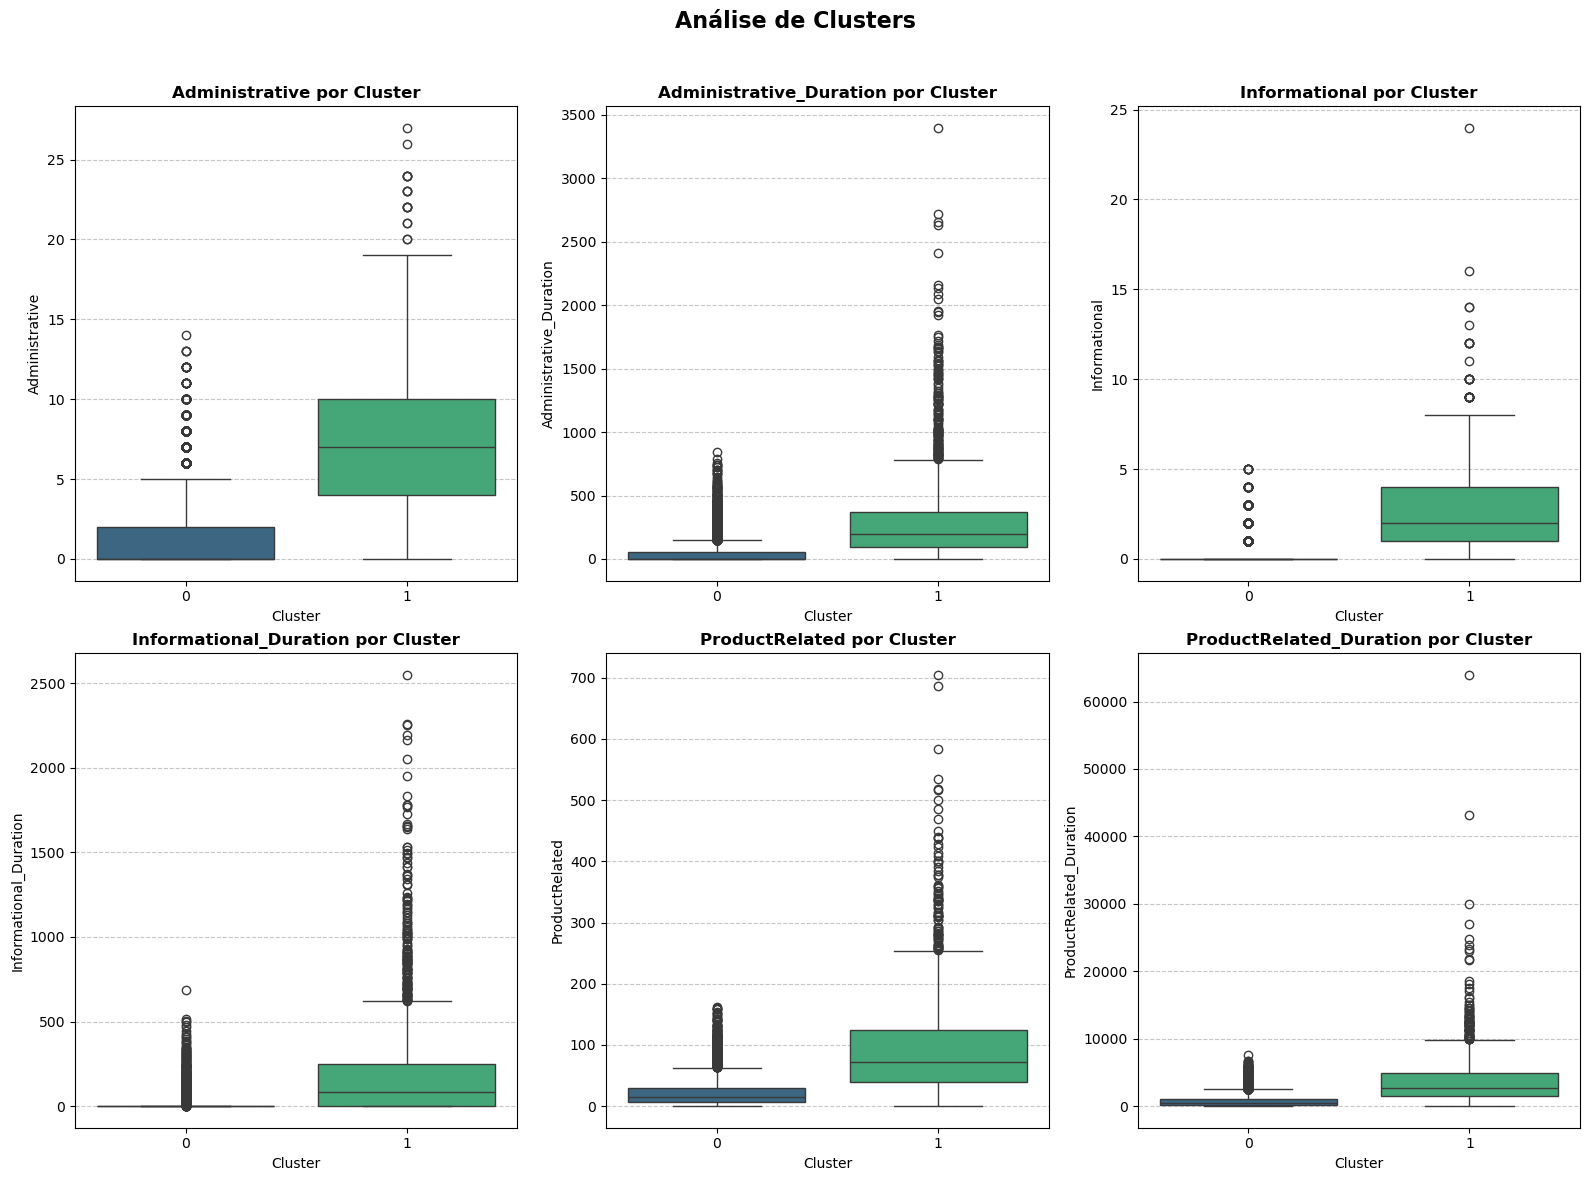

In [9]:
# Selecionar apenas colunas numéricas
colunas_numericas = df_escopo.select_dtypes(include=['float64', 'int64']).columns
df_numerico = df_escopo[colunas_numericas]

# Padronização dos dados
scaler = StandardScaler()
X_pad = scaler.fit_transform(df_numerico)

# Realizar clusterização para 2 clusters
km = KMeans(n_clusters=2, random_state=42)
clusters = km.fit_predict(X_pad)
    
# Adicionar coluna de clusters ao DataFrame original
df_clustered_2 = df_numerico.copy()
df_clustered_2['Cluster'] = clusters

# Converter 'Cluster' para categoria 
df_clustered_2['Cluster'] = df_clustered_2['Cluster'].astype('category')

# Criar apenas uma figura para todos os subplots (remova a primeira chamada plt.figure())
plt.figure(figsize=(16, 12))
    
# Obter colunas (exceto 'Cluster')
colunas = [col for col in df_clustered_2.columns if col != 'Cluster']
    
# Criar subplots para cada variável
for i, coluna in enumerate(colunas, 1):
    plt.subplot(2, 3, i)
        
    # Criar boxplot com cores por cluster
    ax = sns.boxplot(x='Cluster', y=coluna, data=df_clustered_2, hue='Cluster', palette="viridis", legend=False)
        
    # Personalizar o gráfico
    plt.title(f'{coluna} por Cluster', fontsize=12, fontweight='bold')
    plt.xlabel('Cluster', fontsize=10)
    plt.ylabel(coluna, fontsize=10)
        
    # Adicionar grid para melhor visualização
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
# Ajustar layout e título geral
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle("Análise de Clusters", fontsize=16, fontweight='bold')
    
# Exibir o gráfico
plt.show()

### Para 4 Clusters

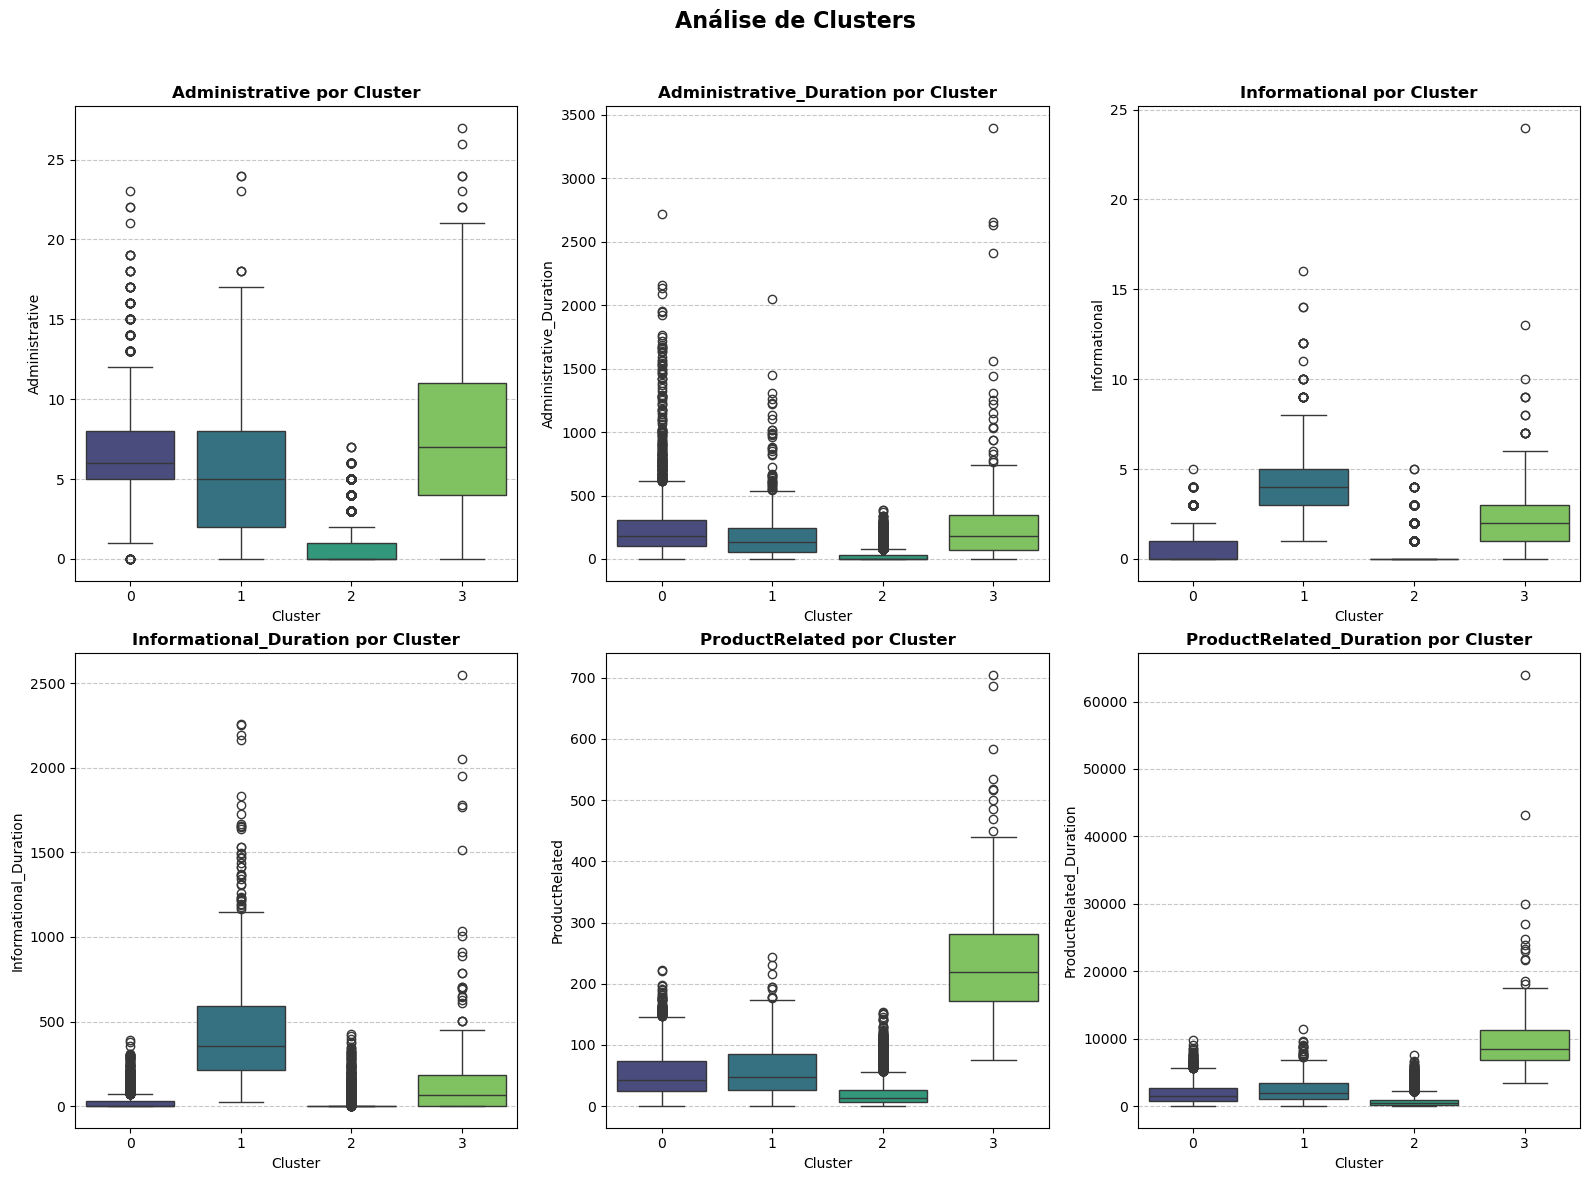

In [10]:
# Selecionar apenas colunas numéricas
colunas_numericas = df_escopo.select_dtypes(include=['float64', 'int64']).columns
df_numerico = df_escopo[colunas_numericas]

# Padronização dos dados
scaler = StandardScaler()
X_pad = scaler.fit_transform(df_numerico)

# Realizar clusterização para 2 clusters
km = KMeans(n_clusters=4, random_state=42)
clusters = km.fit_predict(X_pad)
    
# Adicionar coluna de clusters ao DataFrame original
df_clustered_4 = df_numerico.copy()
df_clustered_4['Cluster'] = clusters

# Converter 'Cluster' para categoria 
df_clustered_4['Cluster'] = df_clustered_4['Cluster'].astype('category')

# Criar apenas uma figura para todos os subplots (remova a primeira chamada plt.figure())
plt.figure(figsize=(16, 12))
    
# Obter colunas (exceto 'Cluster')
colunas = [col for col in df_clustered_4.columns if col != 'Cluster']
    
# Criar subplots para cada variável
for i, coluna in enumerate(colunas, 1):
    plt.subplot(2, 3, i)
        
    # Criar boxplot com cores por cluster
    ax = sns.boxplot(x='Cluster', y=coluna, data=df_clustered_4, hue='Cluster', palette="viridis", legend=False)
        
    # Personalizar o gráfico
    plt.title(f'{coluna} por Cluster', fontsize=12, fontweight='bold')
    plt.xlabel('Cluster', fontsize=10)
    plt.ylabel(coluna, fontsize=10)
        
    # Adicionar grid para melhor visualização
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
# Ajustar layout e título geral
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle("Análise de Clusters", fontsize=16, fontweight='bold')
    
# Exibir o gráfico
plt.show()

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

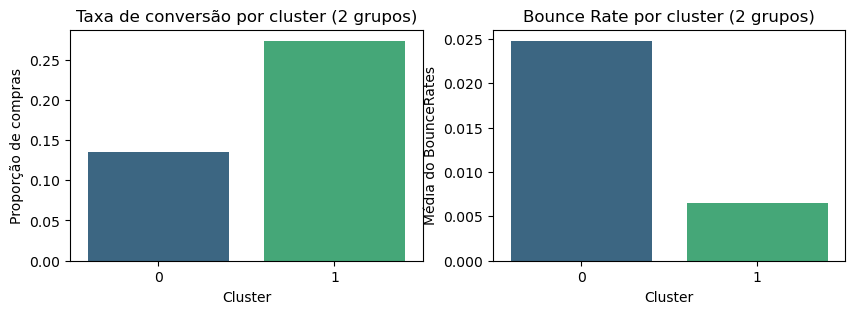

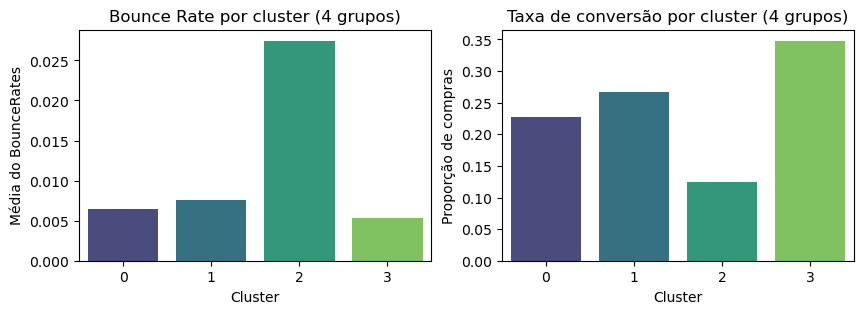

In [11]:
# Unir os clusters com as colunas corretas
df_merged_2 = df[['Revenue', 'BounceRates']].join(df_clustered_2['Cluster'])
df_merged_4 = df[['Revenue', 'BounceRates']].join(df_clustered_4['Cluster'])

# Análise de taxa de conversão (proporção de Revenue=1 por cluster)
conversion_rate_2 = df_merged_2.groupby('Cluster')['Revenue'].mean()
conversion_rate_4 = df_merged_4.groupby('Cluster')['Revenue'].mean()

# Análise de BounceRates médio por cluster
bounce_rate_2 = df_merged_2.groupby('Cluster')['BounceRates'].mean()
bounce_rate_4 = df_merged_4.groupby('Cluster')['BounceRates'].mean()

# Criando gráficos de taxa de conversão
fig, ax = plt.subplots(1, 2, figsize=(10, 3))

sns.barplot(x=conversion_rate_2.index, y=conversion_rate_2.values, palette="viridis", ax=ax[0])
ax[0].set_title('Taxa de conversão por cluster (2 grupos)')
ax[0].set_ylabel('Proporção de compras')

sns.barplot(x=bounce_rate_2.index, y=bounce_rate_2.values, palette="viridis",ax=ax[1])
ax[1].set_title('Bounce Rate por cluster (2 grupos)')
ax[1].set_ylabel('Média do BounceRates')

plt.show()

# Criando gráficos de BounceRates
fig, ax = plt.subplots(1, 2, figsize=(10, 3))

sns.barplot(x=bounce_rate_4.index, y=bounce_rate_4.values, palette="viridis", ax=ax[0])
ax[0].set_title('Bounce Rate por cluster (4 grupos)')
ax[0].set_ylabel('Média do BounceRates')

sns.barplot(x=conversion_rate_4.index, y=conversion_rate_4.values, palette="viridis",ax=ax[1])
ax[1].set_title('Taxa de conversão por cluster (4 grupos)')
ax[1].set_ylabel('Proporção de compras')

plt.show()

Quando olhamos pros 2 agrupamentos, o cluster 1 é aquele mais propenso à compra, pois possui uma taxa de conversão maior e um bounce rate menor. Para o de 4 agrupamentos, o cluster que compra mais frequentemente é o 2.

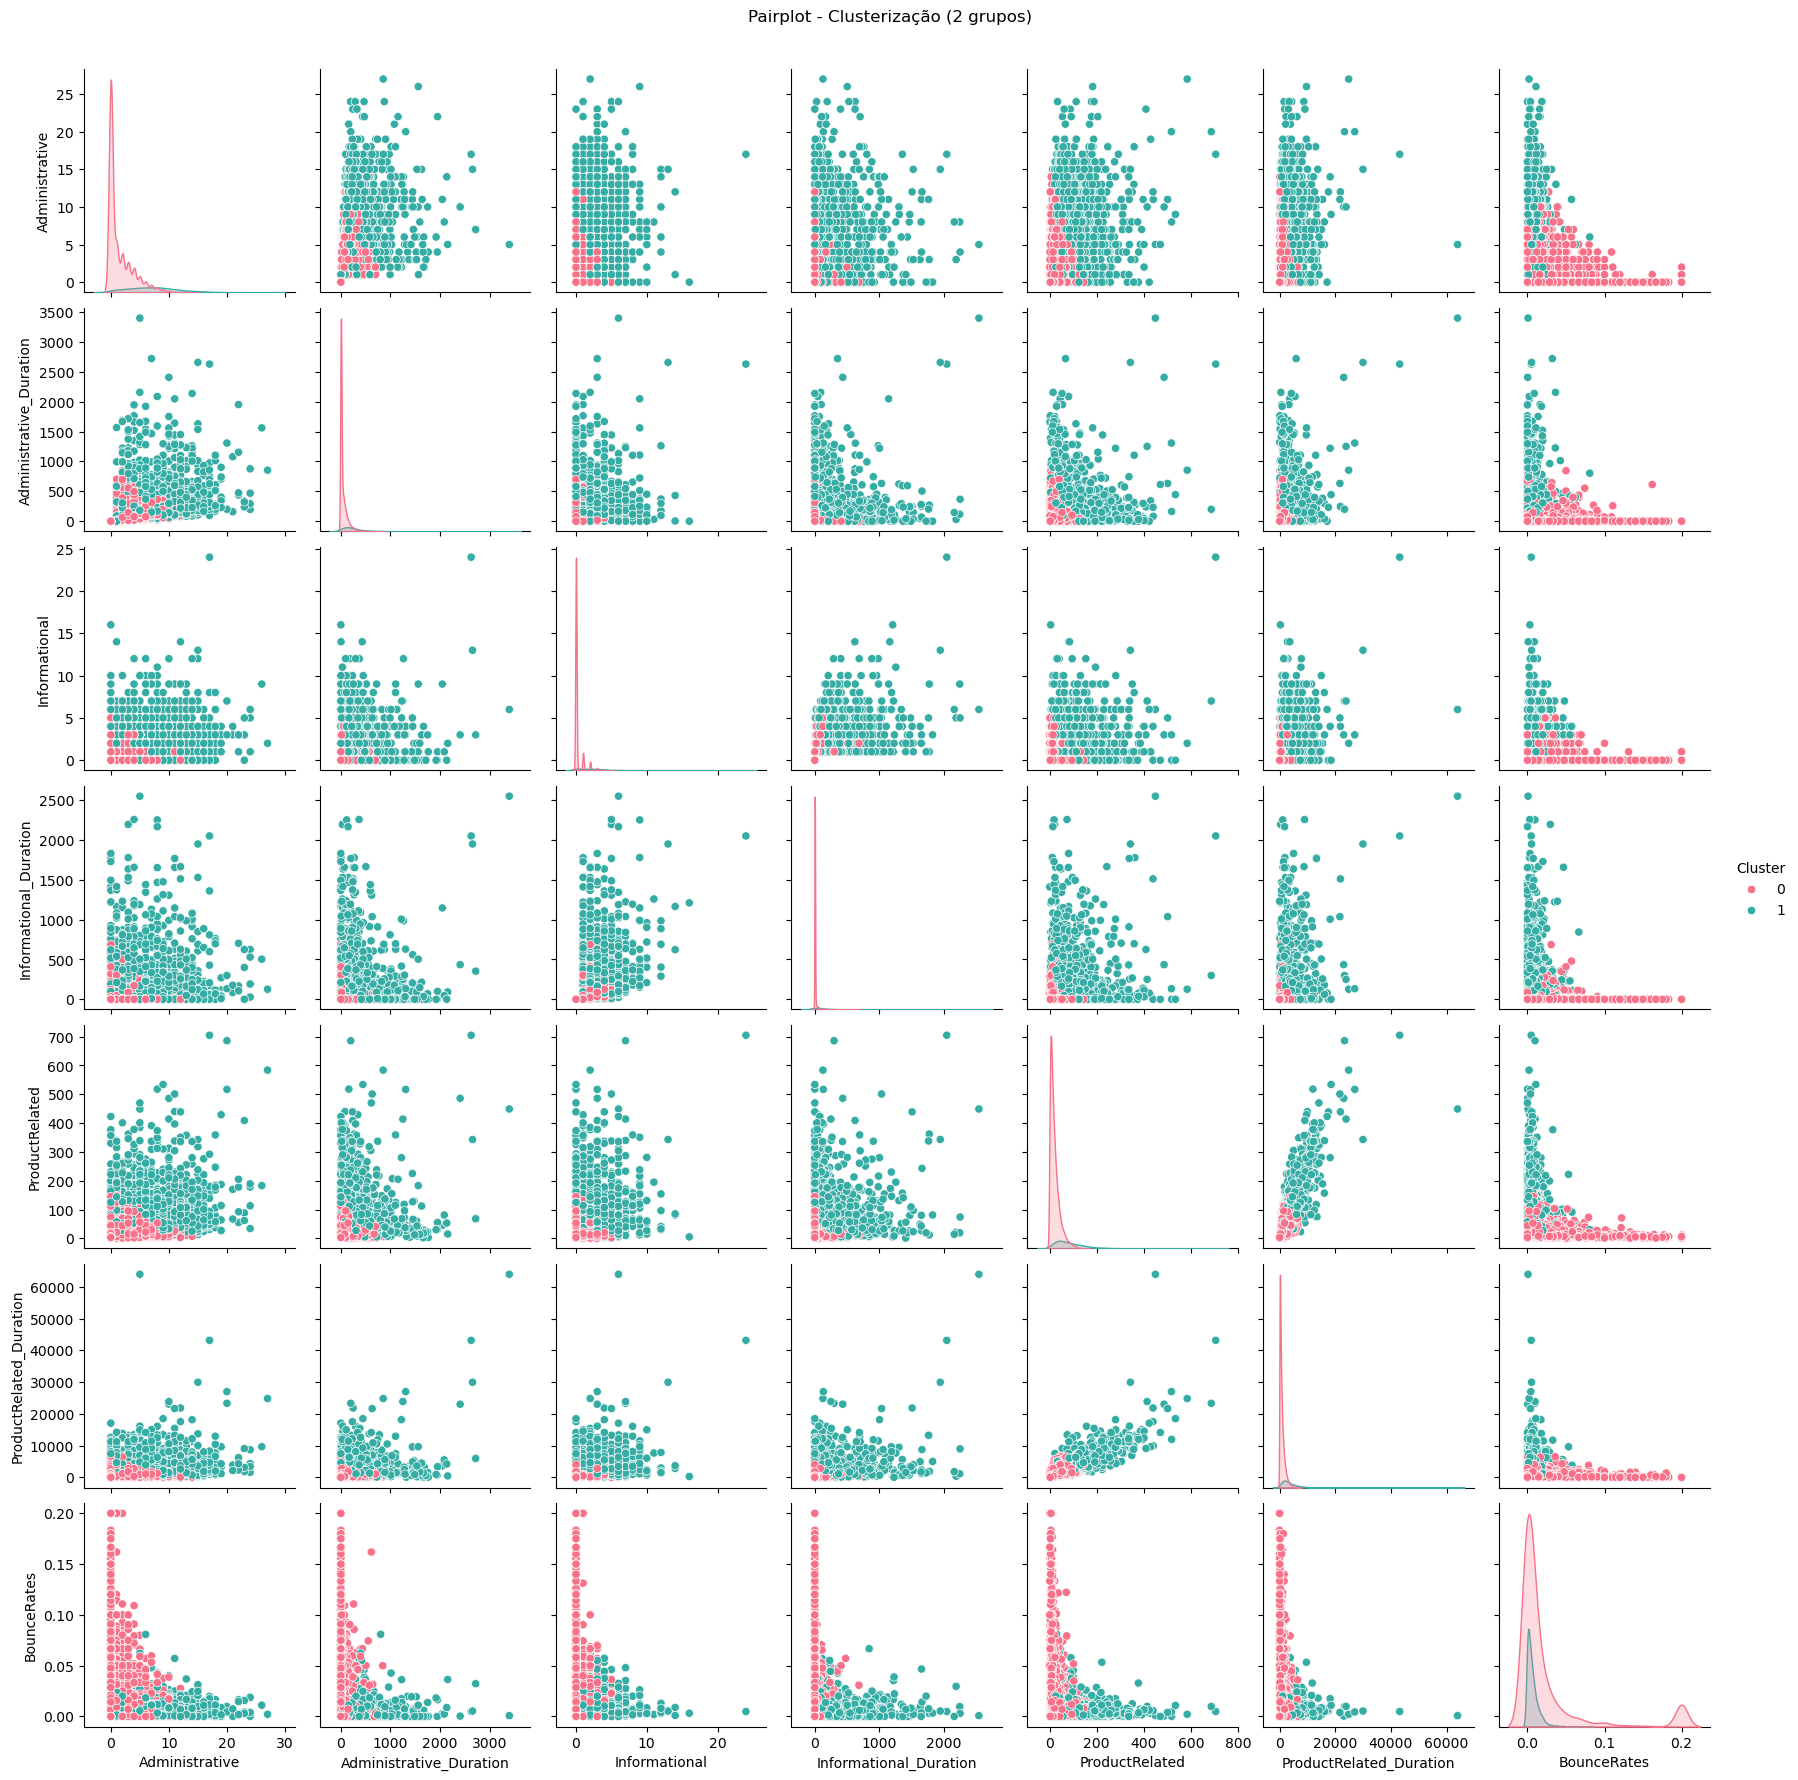

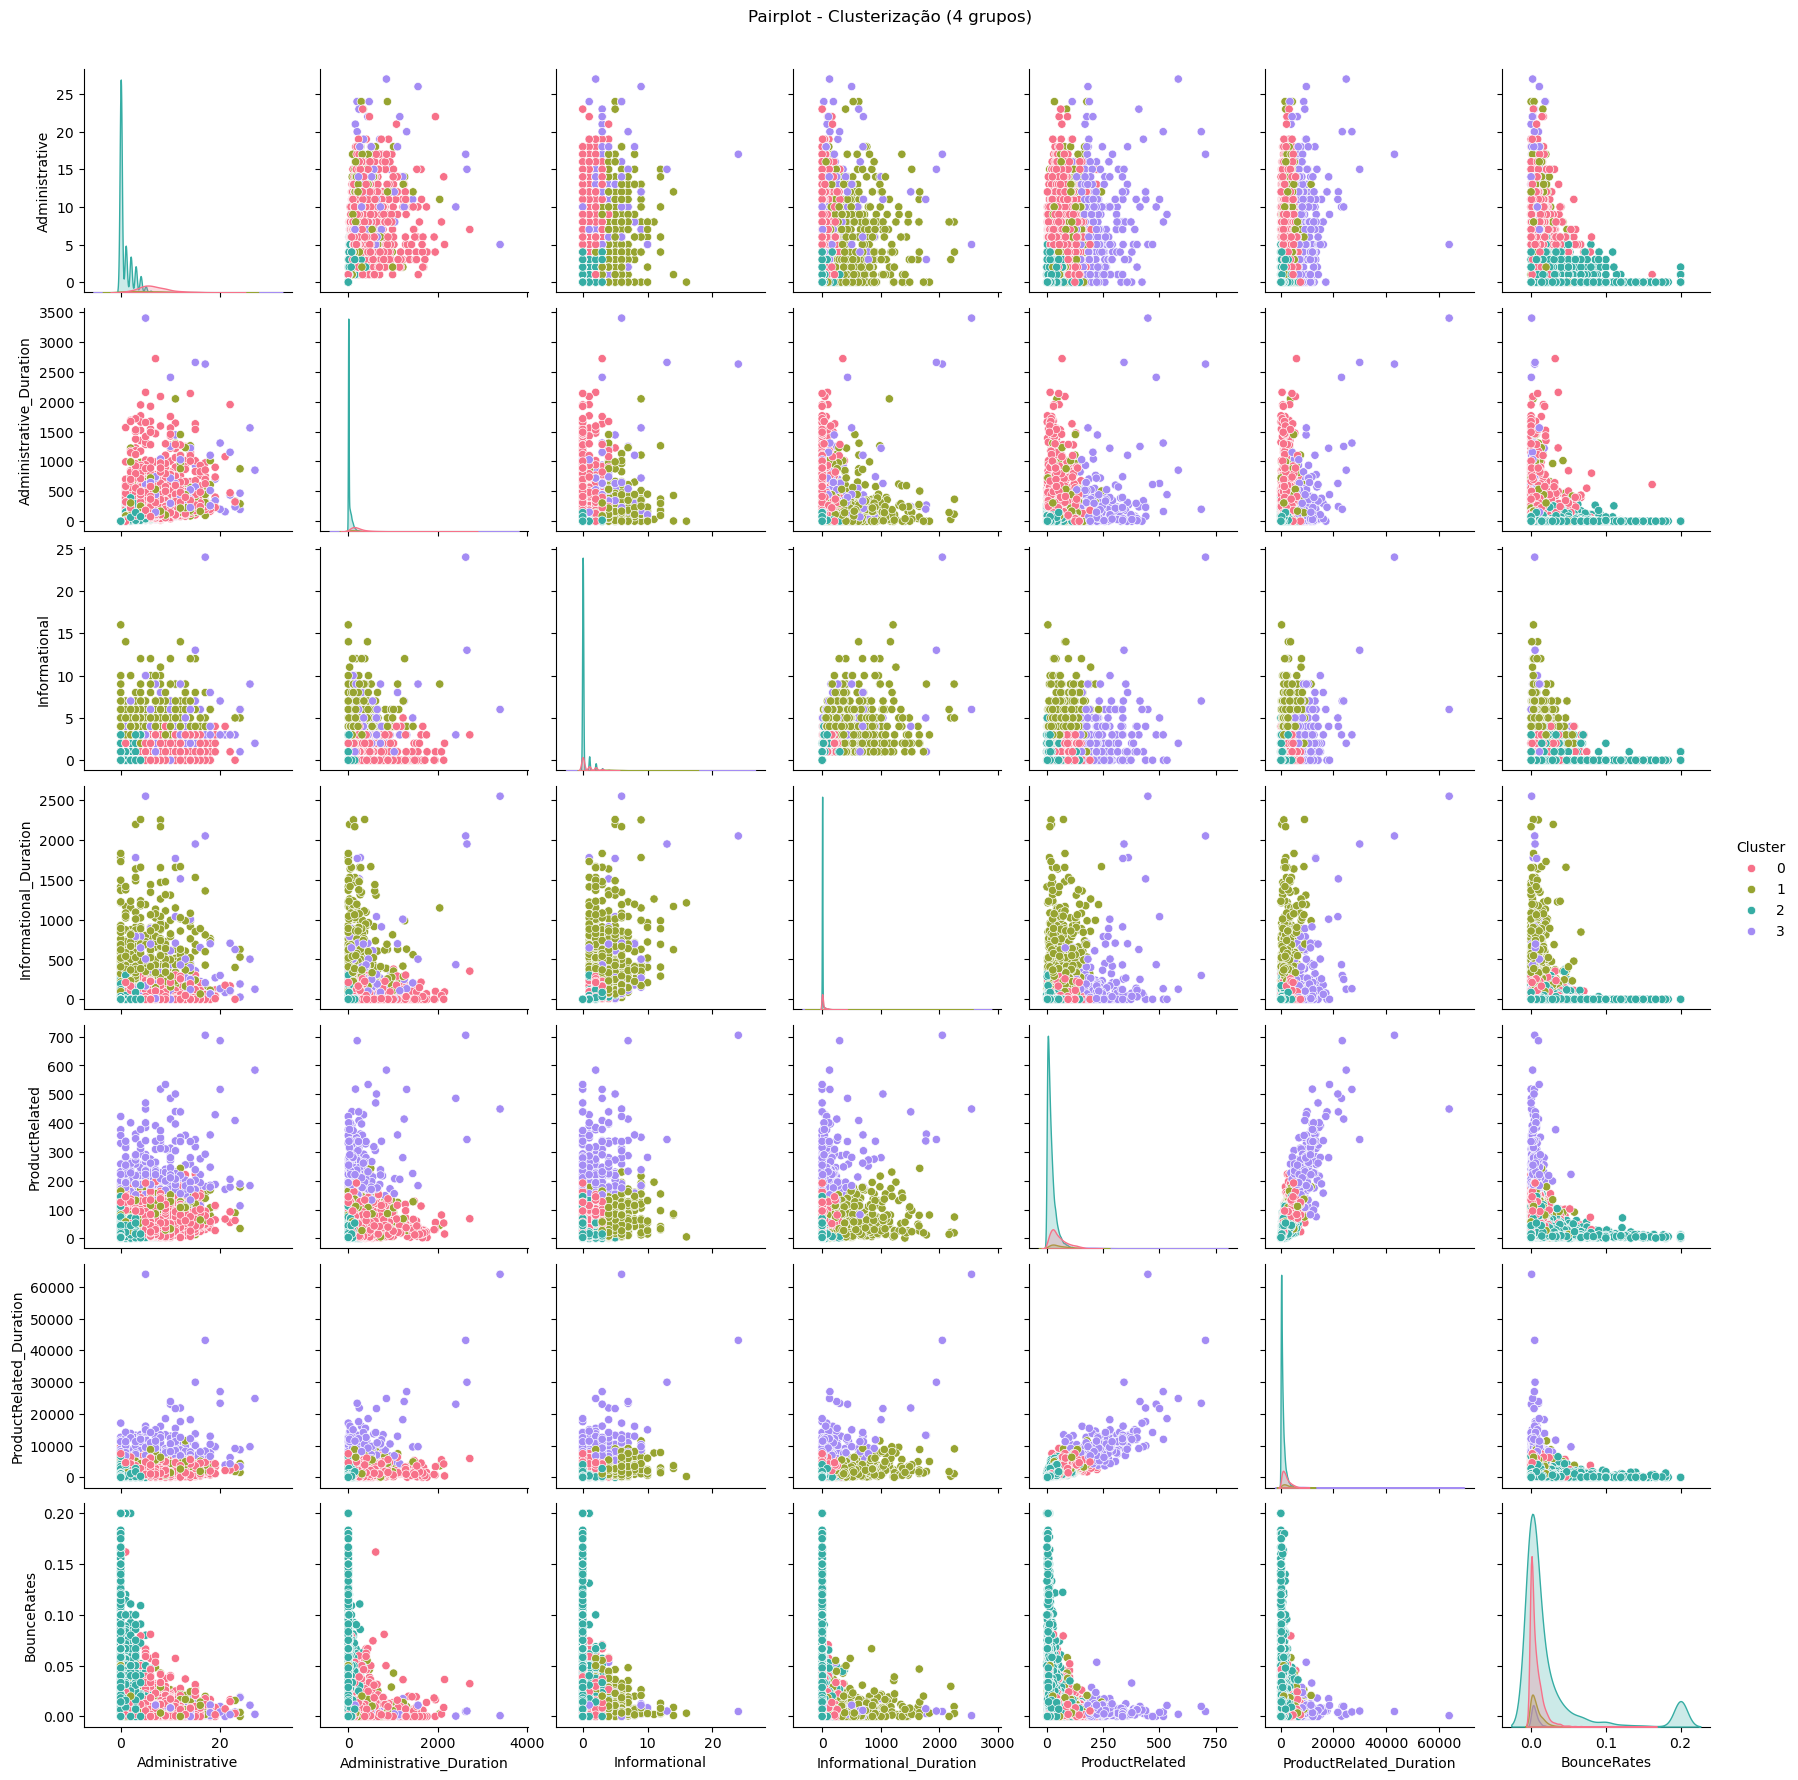

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remover as colunas 'BounceRates' e 'Revenue' dos dfs clusterizados caso já existam
df_clustered_2 = df_clustered_2.drop(columns=['BounceRates', 'Revenue'], errors='ignore')
df_clustered_4 = df_clustered_4.drop(columns=['BounceRates', 'Revenue'], errors='ignore')

# Adicionar 'BounceRates' e 'Revenue' aos dfs clusterizados
df_clustered_2 = df_clustered_2.merge(df[['BounceRates', 'Revenue']], left_index=True, right_index=True)
df_clustered_4 = df_clustered_4.merge(df[['BounceRates', 'Revenue']], left_index=True, right_index=True)

# Selecionar apenas colunas numéricas, garantindo que 'Cluster' seja mantido
num_cols_2 = df_clustered_2.select_dtypes(include=['number']).columns.tolist()
num_cols_4 = df_clustered_4.select_dtypes(include=['number']).columns.tolist()

# Garantir que 'Cluster' esteja na lista (caso tenha sido removido)
if 'Cluster' not in num_cols_2:
    num_cols_2.append('Cluster')
if 'Cluster' not in num_cols_4:
    num_cols_4.append('Cluster')

# Pairplot para 2 clusters (apenas colunas numéricas)
sns.pairplot(df_clustered_2[num_cols_2], hue='Cluster', palette='husl', diag_kind='kde')
plt.suptitle("Pairplot - Clusterização (2 grupos)", y=1.02)
plt.show()

# Pairplot para 4 clusters (apenas colunas numéricas)
sns.pairplot(df_clustered_4[num_cols_4], hue='Cluster', palette='husl', diag_kind='kde')
plt.suptitle("Pairplot - Clusterização (4 grupos)", y=1.02)
plt.show()


### Conclusões

In [23]:
# Criar uma função para calcular estatísticas descritivas por cluster

df_num_cols_2 = df_clustered_2[num_cols_2]
df_num_cols_4 = df_clustered_4[num_cols_4]

def perfil_clusters_transposto(df, nome):
    # Calcula estatísticas descritivas
    perfil = df.groupby('Cluster').agg(['mean', 'std']).T  # Transpor os dados
    
    # Criar DataFrame separado para o tamanho do grupo
    tamanho_grupo = df['Cluster'].value_counts().sort_index().rename("Tamanho do Grupo").to_frame().T
    
    print(f"\nPerfil dos Clusters ({nome}):\n")
    display(tamanho_grupo)  # Exibir tamanho do grupo
    display(perfil)  # Exibir estatísticas descritivas

# Aplicando aos clusters de 2 e 4 grupos
perfil_clusters_transposto(df_num_cols_2, "2 Clusters")
perfil_clusters_transposto(df_num_cols_4, "4 Clusters")



Perfil dos Clusters (2 Clusters):



Cluster,0,1
Tamanho do Grupo,10578,1752


Cluster                                0            1
Administrative          mean    1.494611     7.269406
                        std     2.197754     4.459913
Administrative_Duration mean   44.058464   302.764289
                        std    82.816312   348.080741
Informational           mean    0.188788     2.404110
                        std     0.572113     2.273665
Informational_Duration  mean    7.037474   200.115446
                        std    33.057733   317.625021
ProductRelated          mean   21.363490    94.329909
                        std    21.601694    80.863569
ProductRelated_Duration mean  776.283968  3721.283722
                        std   904.763936  3660.029284
BounceRates             mean    0.024793     0.006483
                        std     0.051788     0.008106


Perfil dos Clusters (4 Clusters):



Cluster,0,1,2,3
Tamanho do Grupo,2285,577,9218,250


Cluster                                 0            1           2  \
Administrative          mean     6.663457     5.584055    0.876654   
                        std      3.234704     4.314899    1.358283   
Administrative_Duration mean   260.887953   194.262921   23.316800   
                        std    271.787157   230.221272   44.991190   
Informational           mean     0.729978     4.306759    0.157192   
                        std      1.040005     2.166147    0.524255   
Informational_Duration  mean    26.768616   466.857194    5.507445   
                        std     53.658344   375.181269   27.475625   
ProductRelated          mean    53.029322    59.655113   19.062920   
                        std     38.900604    44.228737   19.669747   
ProductRelated_Duration mean  1952.814380  2462.010839  696.814243   
                        std   1549.910368  1969.407835  852.214723   
BounceRates             mean     0.006470     0.007625    0.027456   
                        std      0.009920     0.009581    0.054809   

Cluster                                 3  
Administrative          mean     8.068000  
                        std      5.559407  
Administrative_Duration mean   293.362104  
                        std    420.847557  
Informational           mean     2.428000  
                        std      2.604602  
Informational_Duration  mean   174.936582  
                        std    340.998867  
ProductRelated          mean   239.736000  
                        std     99.320555  
ProductRelated_Duration mean  9700.904340  
                        std   5711.163949  
BounceRates             mean     0.005382  
                        std      0.005645

In [ ]:
# Análise de conversão. Quantas compras foram efetivadas?

# Adicionar Revenue aos dataframes
df_num_cols_2 = df_num_cols_2.merge(df[['Revenue']], left_index=True, right_index=True)
df_num_cols_4 = df_num_cols_4.merge(df[['Revenue']], left_index=True, right_index=True)

# Análise para 2 Clusters
revenue_analysis_2 = df_num_cols_2.groupby('Cluster').agg(
    Quantidade_Compras=('Revenue', 'sum'),
    Total_Usuarios=('Revenue', 'count'),
    Taxa_Conversao=('Revenue', 'mean'),
)

# Análise para 4 Clusters
revenue_analysis_4 = df_num_cols_4.groupby('Cluster').agg(
    Quantidade_Compras=('Revenue', 'sum'),
    Total_Usuarios=('Revenue', 'count'),
    Taxa_Conversao=('Revenue', 'mean'),
)

# Exibir os resultados
print("Análise de conversão para 2 Clusters:")
display(revenue_analysis_2)

print("\nAnálise de conversão para 4 Clusters:")
display(revenue_analysis_4)


Análise de Revenue para 2 Clusters:


,Quantidade_Compras,Total_Usuarios,Taxa_Conversao
Cluster,,,
0,1429,10578,0.135092
1,479,1752,0.273402



Análise de Revenue para 4 Clusters:


,Quantidade_Compras,Total_Usuarios,Taxa_Conversao
Cluster,,,
0,521,2285,0.228009
1,154,577,0.266898
2,1146,9218,0.124322
3,87,250,0.348000


#### Conclusões da análise de 2 Clusters
Com relação ao tamanho dos Clusters, temos que o Cluster 0 tem um grupo muito maior que o Cluster 1, sendo 10.578 integrantes contra 1.752.

O Cluster 1, apesar de menor, passa muito mais tempo em páginas administrativas (Administrative_Duration) e informacionais (Informational_Duration), com valores médios muito superiores aos do Cluster 0. Ao mesmo tempo, também navegam em mais páginas (ProductRelated) e por um tempo significativamente maior (ProductRelated_Duration), sugerindo um comportamento mais investigativo antes da decisão de compra.

Além de passar menos tempo procurando por produtos, o Cluster 0 tem uma taxa de rejeição (BounceRates) quatro vezes maior que o Cluster 1, o que reforça que esses integrantes fazem visitas mais superficiais ao site, enqanto os usuários do Cluster 1 interagem mais e exploram o site de maneira mais detalhada.

Essa maior interação reflete diretamente na taxa de conversão em compras: No Cluster 0, 13,5% dos usuários realizaram compras, enquanto no Cluster 1 27,3% dos usuários realizaram compras, uma taxa que é aproximadamente o dobro da apresentada pelo Cluster 0.

Em conclusão, o Cluster 0 representa visitantes mais casuais, que entram no site e saem rapidamente, sem explorar muitas páginas, enquanto o Cluster 1 representa aqueles usuários mais engajados, que pesquisam bastante antes de tomar decisões e têm uma maior propensão à compra.

#### Conclusões sobre os Clusters (4 Grupos)

Ao dividirmos em 4 grupos, temos o Cluster 2 o maior deles, com 9.218 integrantes, seguido pelo Cluster 0 (2.285), o Cluster 1 (577) e o Cluster 3 (250), que é o menor entre eles.

Com essa divisão, conseguimos detalhar um pouco mais alguns comportamento de navegação dos usuários. O Cluster 2 tem os menores valores médios para quase todas as variáveis, indicando usuários que exploram poucas páginas e passam pouco tempo no site, o Cluster 3 se destaca por um tempo muito alto nas páginas de produtos (ProductRelated_Duration = 9.700 segundos, muito acima dos demais), sugerindo usuários que analisam detalhadamente os produtos antes da compra. O Cluster 1 por sua vez tem valores muito elevados para páginas informacionais (Informational_Duration = 466 segundos), indicando um perfil que busca bastante informação antes de tomar decisões, enquanto o Cluster 0 tem um comportamento intermediário, com tempo moderado em todas as categorias.

O Cluster 2 tem a maior taxa de rejeição (0.0275), reforçando que esse grupo pode ser composto por usuários menos engajados. O Cluster 3, apesar do tempo alto em páginas de produtos, tem uma taxa de rejeição muito baixa (0.0053), sugerindo que esses usuários realmente interagem com o site. Os Clusters 0 e 1 possuem uma taxa de rejeição um pouco mais altas que o Cluster 3, mas ainda bem menores que as apresentadas pelo Cluster 2.

A taxa de conversão em compras confirma os perfis:

Cluster 2 - 12,4% de conversão, reforçando que é o grupo menos engajado.

Cluster 3 - 34,8% de conversão, a maior taxa entre os grupos, reforçando seu perfil altamente investigativo e propenso à compra.

Cluster 1 - 26,7% de conversão, mostrando que o perfil de busca por informações também contribui para decisões de compra.

Cluster 0 - 22,8% de conversão, apresentando um equilíbrio entre navegação e propensão à compra.


Para concuir, o Cluster 2 representa usuários mais casuais, com pouco tempo de navegação e alta taxa de rejeição, assim como o Cluster 0 realizado no exercício com 2 grupos. O Cluster 0 é composto por usuários equilibrados, com engajamento moderado, sem se exceder em nenhuma estatistica. O Cluster 1 é composto por visitantes que buscam muitas informações antes de decidir e possuem a segunda maior taxa de conversão entre os grupos, enquanto o Cluster 3 consiste em um grupo de possíveis compradores, altamente engajados e com a maior taxa de conversão, sendo mais próximos do Cluster 1 do exercício anterior.